In [1]:
!pip install pillow
import PIL
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Copying Images
- If you want to reassign an array to another variable, you should use the copy method

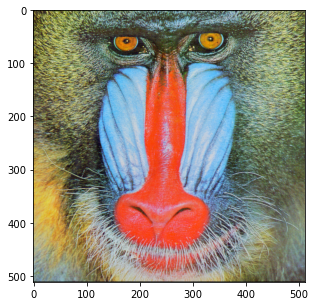

In [2]:
baboon=np.array(Image.open('baboon.png'))
plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()

In [3]:
#if we donot apply the method copy(), the variable would point to the same location in memory
A=baboon

- we  use the id function to find a variable's memory address,  memory space which the variable A and baboon to are the same

In [4]:
id(A)==id(baboon)

True

In [5]:
b=baboon.copy()
id(b)==id(baboon)

False

In [6]:
baboon[:,:,] = 0

- There may be unexpected behaviours when two variables point to the same object in memory. Consider the array baboon. If we set all its entries to zero, all entires in A will become zero as well. However, as baboon and B points to different objects, the values in B will not be affected.

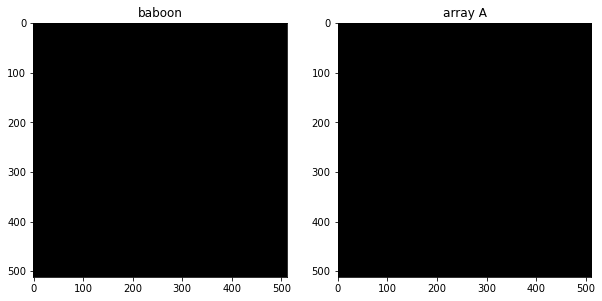

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

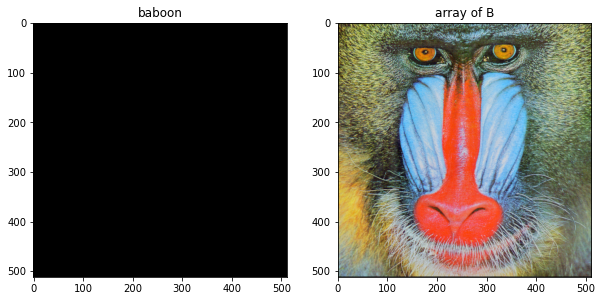

In [8]:
# we can also compare baboon and array B
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title('baboon')
plt.subplot(122)
plt.imshow(b)
plt.title('array of B')
plt.show()

## Flipping Images
- flipping Images involves reordering the indices of the pixels such that it changes the orientation of the image.

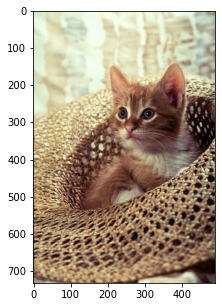

In [9]:
#original Images
image=Image.open('cat.png')
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

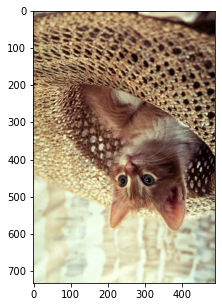

In [10]:
#The flip() method of ImageOps module flips the image.
from PIL import ImageOps
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

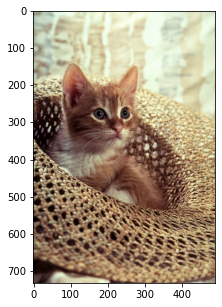

In [11]:
#The mirror() method will mirror the image
im_mirror=ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

- we can transpose() methid; the parameter is an integer indicating what type of transposition we would like to perform,

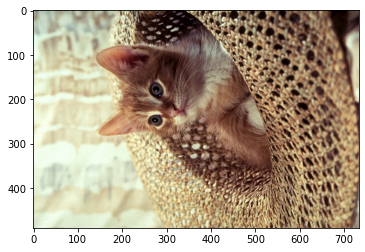

In [12]:
im_flip=image.transpose(2)
plt.imshow(im_flip)
plt.show()

In [13]:
flip={
    "FLIP_LEFT_RIGHT":Image.FLIP_LEFT_RIGHT,
    'FLIP_RIGHT_BOTTOM':Image.FLIP_TOP_BOTTOM,
    'ROTATE_90':Image.ROTATE_90,
    'ROTATE_180':Image.ROTATE_180,
    'ROTATE_270':Image.ROTATE_270,
    'TRANSPOSE':Image.TRANSPOSE,
    'TRANSVERSE':Image.TRANSVERSE
}

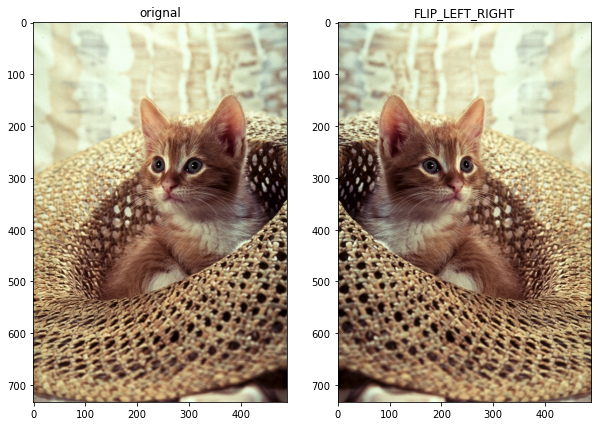

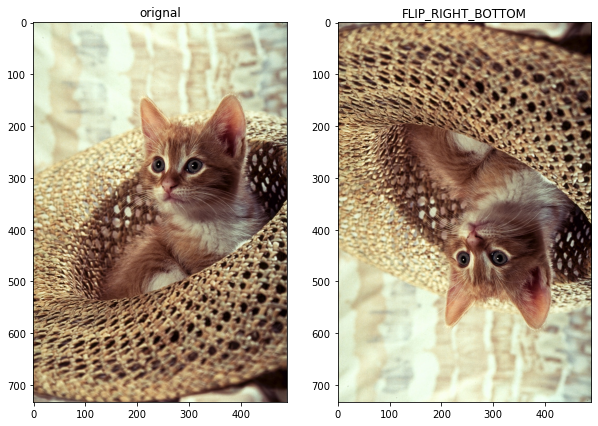

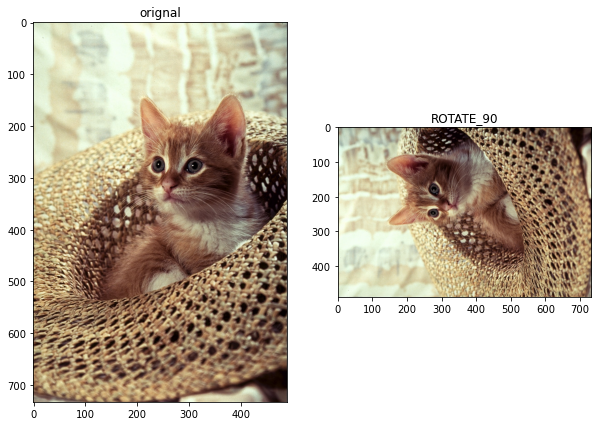

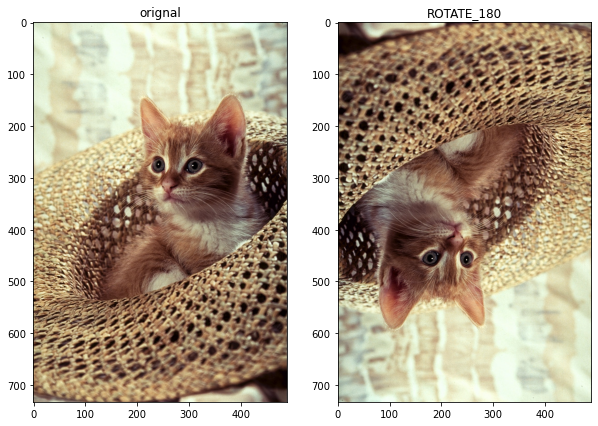

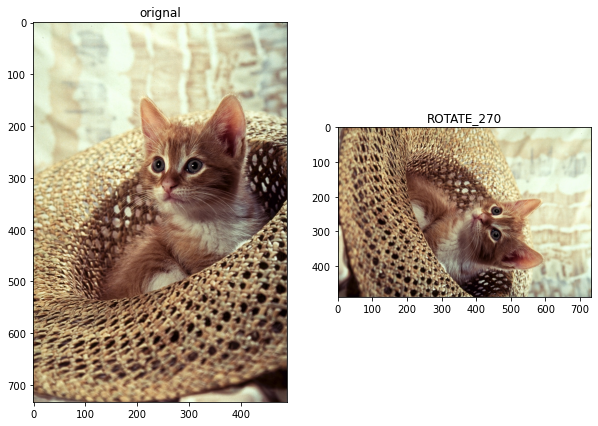

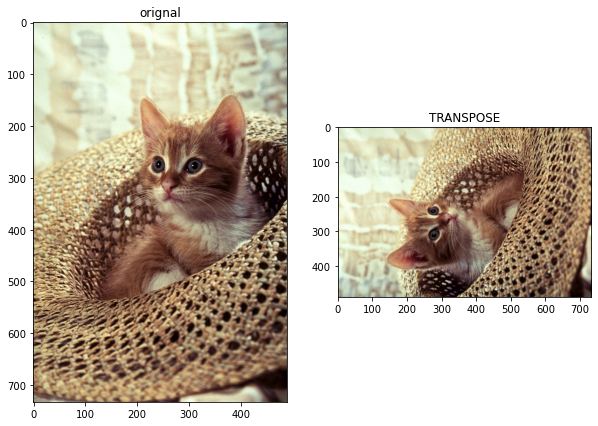

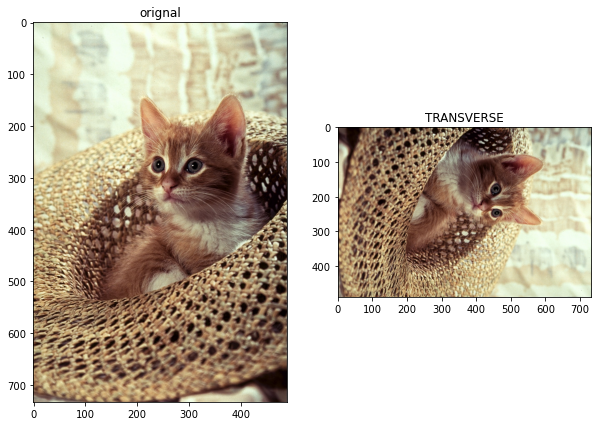

In [14]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

## Croping an Image
- Cropping is the act of 'cutting out' a part of an image and throwing out the rest. 
- vertical crop- The variable upper is the index of the first row that we would like to include in the image, the variable lower is index of last row we would like to include. we then perform array slicing to obtain the new image.

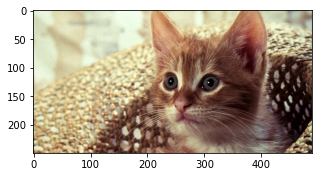

In [15]:
array=np.array(image)
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

- Consider the array crop_top: we can also crop horisontally. The variable right is the index of the first column that we would like to include in the image and the variable left is the index of the last column we would like to include in the image

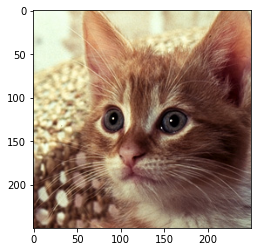

In [16]:
left=150
right=400
crop_horizontal=crop_top[:,left:right,:]
plt.imshow(crop_horizontal)
plt.show()

- you can crop the PIL image using the crop() method, using the parameter from the above set the cropping area with box=(left,upper,right,lower)


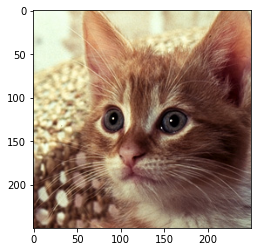

In [17]:
image=Image.open('cat.png')
crop_image=image.crop((left,upper,right,lower))
plt.imshow(crop_image)
plt.show()

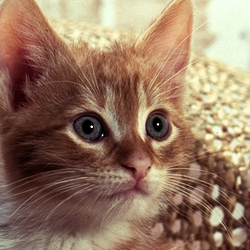

In [18]:
# we can also flio the new image
crop_image=crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

### Changing specific image Pixels
- we can change specific image pixels using array indexing, for example we can set all the green and blue channels in the original image we cropped to zero

In [19]:
array_sq=np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

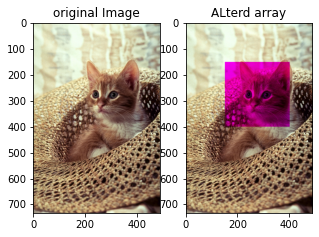

In [20]:
# we can compare the results with the new image
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title('original Image')
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title('ALterd array')
plt.show()

In [21]:
## we can also use the Image Draw module from PIL library, which provides simple 2D graphics for image objects
from PIL import ImageDraw

In [22]:
image_draw=image.copy()

In [23]:
image_fn=ImageDraw.Draw(im=image_draw)

In [24]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="red")

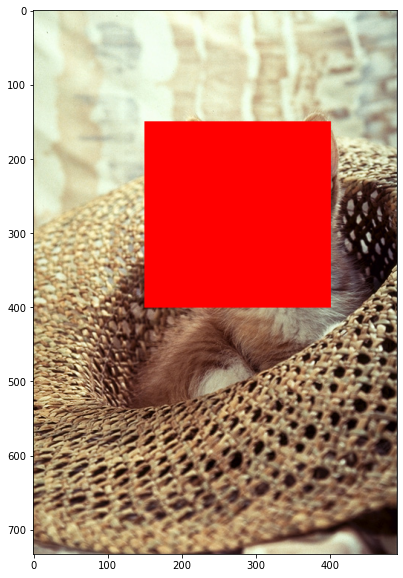

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()